In [139]:
# Importando librerias para el proceso 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('trainReg.csv')
data.describe()

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
count,77779.000000,77779.000000,77779.000000,77779.000000,77779.0,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,...,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000
mean,48244.238342,2002.308129,43.425185,-0.136720,0.0,3.755313,-2.339768,-1.643095,-6.814997,-9.587264,...,15.717215,-71.733008,41.679287,37.816353,0.328213,17.575097,-25.628857,4.463484,18.664885,1.240194
std,27846.283673,10.811038,6.128869,4.370466,0.0,17.609183,14.483975,7.898574,22.980515,12.911914,...,32.211995,176.893351,123.523393,95.335357,16.272689,115.243644,173.310304,13.526414,186.690183,22.379654
min,1.000000,1926.000000,4.836880,-69.680870,0.0,-165.221610,-121.475340,-72.503850,-152.407550,-70.693420,...,-424.517570,-4402.376440,-1733.722110,-1848.702260,-238.386730,-3168.924570,-4319.992320,-236.039260,-7458.378150,-281.150600
25%,24079.500000,1998.000000,40.060315,-2.612435,0.0,-7.016240,-10.685075,-6.300690,-21.265305,-18.583065,...,-1.968265,-136.511095,-21.467975,-4.604295,-6.702370,-31.569390,-100.668480,-2.569360,-60.121980,-8.900120
50%,48357.000000,2006.000000,44.323850,-0.063000,0.0,2.022100,-2.054560,-1.586240,-6.307610,-11.238330,...,9.079980,-51.322570,28.217560,33.417370,0.788980,15.237360,-21.581640,3.136900,5.941490,-0.095340
75%,72340.500000,2010.000000,47.900080,2.465950,0.0,12.776450,6.423900,3.077055,7.617995,-2.329330,...,26.211700,13.999870,89.190475,77.216175,8.354270,67.361475,51.333150,10.002145,84.389125,9.520700
max,96435.000000,2014.000000,60.034010,23.815260,0.0,274.658580,160.815220,68.447960,262.068870,112.971410,...,840.973380,2147.942140,3210.701700,1482.642140,199.121500,2144.103910,2833.608950,275.353660,5289.111380,600.766240


In [97]:
nsongs = {}
for y in range(1926,2014):
    nsongs[y] = len(data[data.Y==y])
    print ("Year=%d, nsongs=%d" % (y, nsongs[y]))



Year=1926, nsongs=1
Year=1927, nsongs=0
Year=1928, nsongs=0
Year=1929, nsongs=0
Year=1930, nsongs=0
Year=1931, nsongs=0
Year=1932, nsongs=7
Year=1933, nsongs=18
Year=1934, nsongs=1
Year=1935, nsongs=20
Year=1936, nsongs=0
Year=1937, nsongs=0
Year=1938, nsongs=0
Year=1939, nsongs=0
Year=1940, nsongs=0
Year=1941, nsongs=0
Year=1942, nsongs=0
Year=1943, nsongs=1
Year=1944, nsongs=1
Year=1945, nsongs=0
Year=1946, nsongs=1
Year=1947, nsongs=0
Year=1948, nsongs=2
Year=1949, nsongs=8
Year=1950, nsongs=1
Year=1951, nsongs=8
Year=1952, nsongs=5
Year=1953, nsongs=14
Year=1954, nsongs=7
Year=1955, nsongs=0
Year=1956, nsongs=11
Year=1957, nsongs=15
Year=1958, nsongs=14
Year=1959, nsongs=51
Year=1960, nsongs=106
Year=1961, nsongs=105
Year=1962, nsongs=109
Year=1963, nsongs=58
Year=1964, nsongs=99
Year=1965, nsongs=55
Year=1966, nsongs=103
Year=1967, nsongs=158
Year=1968, nsongs=145
Year=1969, nsongs=164
Year=1970, nsongs=228
Year=1971, nsongs=248
Year=1972, nsongs=327
Year=1973, nsongs=301
Year=197

Text(0, 0.5, 'Cantidad')

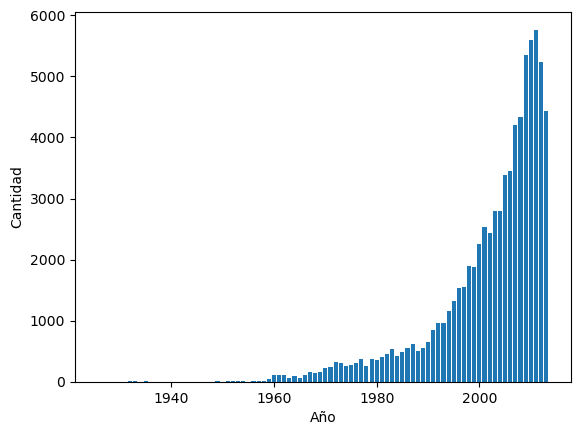

In [98]:
yrs = range(1926,2014)
values = [nsongs[y] for y in yrs]
plt.bar(yrs, values, align='center')
plt.xlabel("Año")
plt.ylabel("Cantidad")

In [153]:
# Dividir los datos en características (X) y etiquetas (Y)
X = data.drop(['ID', 'Y'], axis=1)
Y = data['Y']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


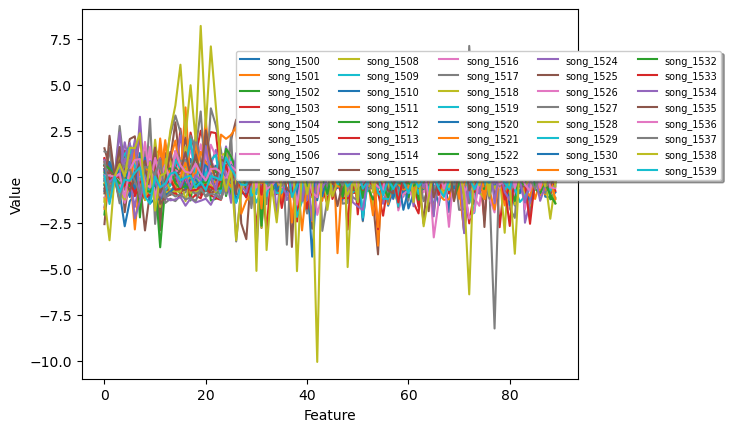

In [127]:
for i in range(1500, 1540):
    plt.plot(X_train[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

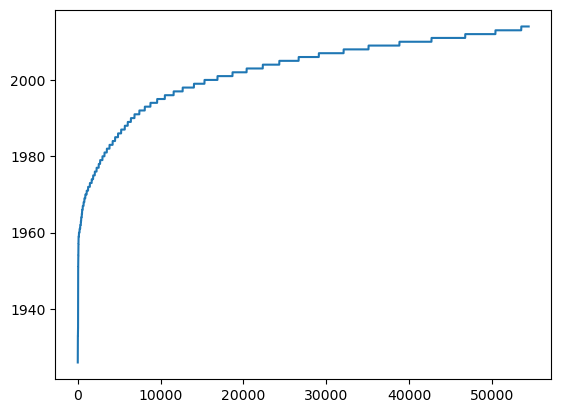

In [129]:
plt.plot(sorted(Y_train))

In [154]:
from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(Y_train)
Y_test = to_categorical()


In [156]:
Y_test.shape


(23334, 2015)

In [160]:
# Our first Keras Model
model1 = Sequential()
model1.add(Dense(2015, input_shape=(2015,)))
model1.add(Dense(2015, activation='softmax'))

In [161]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
def show_scores(model, h):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print ("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print ("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    print ("Over fitting score   = %.6f" % over_fitting_score(h))
    print ("Under fitting score  = %.6f" % under_fitting_score(h))
    view_acc(h)
    plt.show()
    view_loss(h)
    plt.show()

In [162]:

model1.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=0,
    validation_data=(X_test, Y_test),
)

#history=model.fit(X_train, y_train, batch_size=batch_size_p, epochs=epochs_p)

#show_scores(model1, h)



ValueError: in user code:

    File "c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_19" is incompatible with the layer: expected shape=(None, 2015), found shape=(None, 90)
